(50000, 32, 32, 3) uint8
(50000, 32, 32, 3)


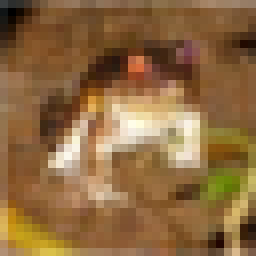

(50000, 1)
(50000, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (Non

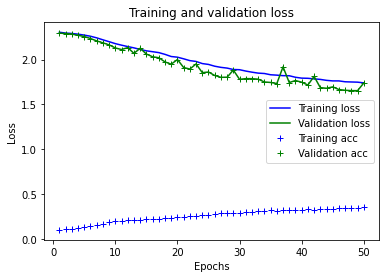

In [1]:
import tensorflow as tf
import tensorflow.keras

from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

#cifar10
img_size =32
ch =3

#mnist
#img_size = 28
#ch = 1

#Load pre_shuffled MNIST data into train and test sets
(train_imgs, train_labels), (test_imgs, test_labels) = cifar10.load_data()
#(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

print(train_imgs.shape, train_imgs.dtype)

train_imgs = train_imgs.reshape(train_imgs.shape[0], img_size, img_size, ch)
test_imgs = test_imgs.reshape(test_imgs.shape[0], img_size, img_size, ch)

print(train_imgs.shape) #(60000,28,28,1)

train_imgs = train_imgs[..., ::-1]
test_imgs = test_imgs[..., ::-1]

import cv2
v_img = cv2.resize(train_imgs[0], (256,256), interpolation = cv2.INTER_NEAREST)

#colab에서 구동
from google.colab.patches import cv2_imshow
cv2_imshow(v_img)

#data형을 float32로 바꾸고 값의 범위는 [0,1]로
train_imgs = train_imgs.astype('float32')
test_imgs = test_imgs.astype('float32')
train_imgs /= 255
test_imgs /= 255

print(train_labels.shape)

#one hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print(train_labels.shape)

Val_Imgs = train_imgs[40000:50000]
Val_Labels = train_labels[40000:50000]

Train_Imgs = train_imgs[:40000]
Train_Labels = train_labels[:40000]

Test_Imgs = test_imgs[:10000]
Test_Labels = test_labels[:10000]

#Keras cnn model  (opt,loss,kernel크기 변경)
model = Sequential()
model.add(Conv2D(8,(5,5), activation ='relu', input_shape=(img_size, img_size, ch)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(16,(5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
model.summary()

print('model fit...')
epoch = 50
history = model.fit(Train_Imgs, Train_Labels, batch_size = 512, epochs = epoch, 
                    validation_data = (Val_Imgs, Val_Labels))
score = model.evaluate(Test_Imgs, Test_Labels, verbose=0)
print("%.2f%% " %score[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print(loss_values)
print(val_loss_values)

epochs = range(1, epoch+1)
from matplotlib import pyplot as plt
plt.plot(epochs, loss_values, 'b-', label='Training loss')
plt.plot(epochs, val_loss_values, 'g-', label='Validation loss')
plt.plot(epochs, acc_values, 'b+', label='Training acc')
plt.plot(epochs, val_loss_values, 'g+', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()